In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 20  
FILTER_SIZES = [(32, 3, 3), (64, 3, 3), (128, 3, 3)]
STRIDES = (1, 1)
PADDING = "same"
DROPOUT_RATE = 0.5
LEARNING_RATE = 0.0001

In [6]:

train_datagen = ImageDataGenerator(                #Data Augmentation
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
path = r'C:\Users\vivek\OneDrive\Desktop\Capstone 2\Dataset\Train'
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.33)


train_generator = train_datagen.flow_from_directory(
    path, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='training'
)

val_generator = val_datagen.flow_from_directory(
    path, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='validation'
)

num_classes = len(train_generator.class_indices)

Found 527 images belonging to 5 classes.
Found 171 images belonging to 5 classes.


In [7]:
# --------------------------- Callbacks (Early Stopping) --------------------------- #
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [19]:
from tensorflow.keras.regularizers import l2
model = Sequential()

# First Conv Block
model.add(Conv2D(FILTER_SIZES[0][0], (FILTER_SIZES[0][1], FILTER_SIZES[0][2]), strides=STRIDES, padding=PADDING, activation='relu', kernel_regularizer=l2(0.001), input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv Block
model.add(Conv2D(FILTER_SIZES[1][0], (FILTER_SIZES[1][1], FILTER_SIZES[1][2]), strides=STRIDES, padding=PADDING, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Conv Block
model.add(Conv2D(FILTER_SIZES[2][0], (FILTER_SIZES[2][1], FILTER_SIZES[2][2]), strides=STRIDES, padding=PADDING, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(DROPOUT_RATE))  # Stronger dropout
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

# Compile Model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss="categorical_crossentropy", metrics=["accuracy"])

# Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

# Save Model
model.save("optimized_cnn_handwriting_model.h5")

Epoch 1/20
17/17 [==============================] - 34s 2s/step - loss: 3.3987 - accuracy: 0.4288 - val_loss: 2.1604 - val_accuracy: 0.4269
Epoch 2/20
17/17 [==============================] - 30s 2s/step - loss: 1.9660 - accuracy: 0.5731 - val_loss: 3.8644 - val_accuracy: 0.2222
Epoch 3/20
17/17 [==============================] - 35s 2s/step - loss: 1.4226 - accuracy: 0.6774 - val_loss: 5.7527 - val_accuracy: 0.2222
Epoch 4/20
17/17 [==============================] - 30s 2s/step - loss: 1.2915 - accuracy: 0.7192 - val_loss: 7.4286 - val_accuracy: 0.2222
Epoch 5/20
17/17 [==============================] - 35s 2s/step - loss: 1.1332 - accuracy: 0.7837 - val_loss: 8.7017 - val_accuracy: 0.2222
Epoch 6/20
17/17 [==============================] - 30s 2s/step - loss: 1.1531 - accuracy: 0.7875 - val_loss: 9.9254 - val_accuracy: 0.2222


In [9]:
normal_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                      

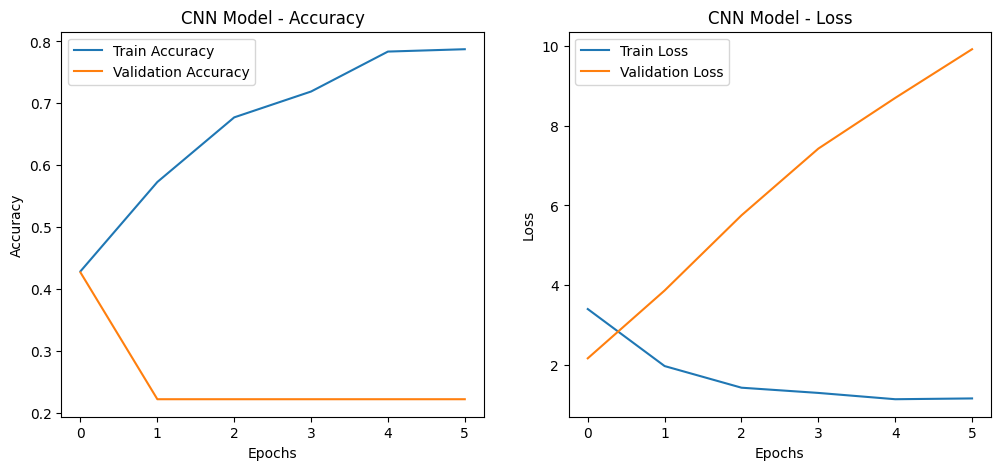

In [27]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("CNN Model - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("CNN Model - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## --------------------------- VGG16 Transfer Learning Model --------------------------- #

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load pre-trained VGG16 without top layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier
x = Flatten()(base_model.output)  # Flatten the output of the base model
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(len(train_generator.class_indices), activation='softmax')(x)  # Ensure x is reassigned

# Create and compile the model
vgg_model = Model(inputs=base_model.input, outputs=x)
vgg_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history_vgg = vgg_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping]
)

# Save the trained model
vgg_model.save("vgg16_handwriting_model1.h5")

Epoch 1/20
17/17 [==============================] - 70s 4s/step - loss: 1.3073 - accuracy: 0.5142 - val_loss: 0.6309 - val_accuracy: 0.7427
Epoch 2/20
17/17 [==============================] - 48s 3s/step - loss: 0.6837 - accuracy: 0.7173 - val_loss: 0.3852 - val_accuracy: 0.8889
Epoch 3/20
17/17 [==============================] - 72s 4s/step - loss: 0.6412 - accuracy: 0.7343 - val_loss: 0.3352 - val_accuracy: 0.9064
Epoch 4/20
17/17 [==============================] - 61s 4s/step - loss: 0.5332 - accuracy: 0.7875 - val_loss: 0.3960 - val_accuracy: 0.8363
Epoch 5/20
17/17 [==============================] - 69s 4s/step - loss: 0.5558 - accuracy: 0.7837 - val_loss: 0.3414 - val_accuracy: 0.8830
Epoch 6/20
17/17 [==============================] - 54s 3s/step - loss: 0.5159 - accuracy: 0.7989 - val_loss: 0.3880 - val_accuracy: 0.8304
Epoch 7/20
17/17 [==============================] - 53s 3s/step - loss: 0.4754 - accuracy: 0.7970 - val_loss: 0.2793 - val_accuracy: 0.8947
Epoch 8/20
17/17 [==

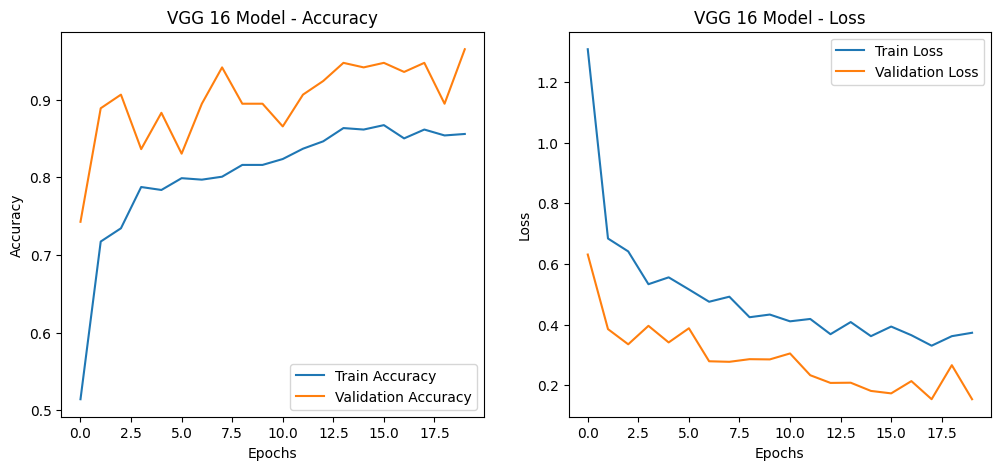

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.title("VGG 16 Model - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.title("VGG 16 Model - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

### --------------------------- Evaluation & Confusion Matrix --------------------------- #

6/6 [==============================] - 6s 963ms/step

Classification Report for Normal CNN:

              precision    recall  f1-score   support

      Anjali       0.28      0.23      0.25        35
      Kishor       0.27      0.63      0.38        38
     Savitha       0.00      0.00      0.00        43
        Teju       0.28      0.39      0.33        38
      Yashas       0.00      0.00      0.00        17

    accuracy                           0.27       171
   macro avg       0.17      0.25      0.19       171
weighted avg       0.18      0.27      0.21       171



C:\Users\vivek\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vivek\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vivek\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

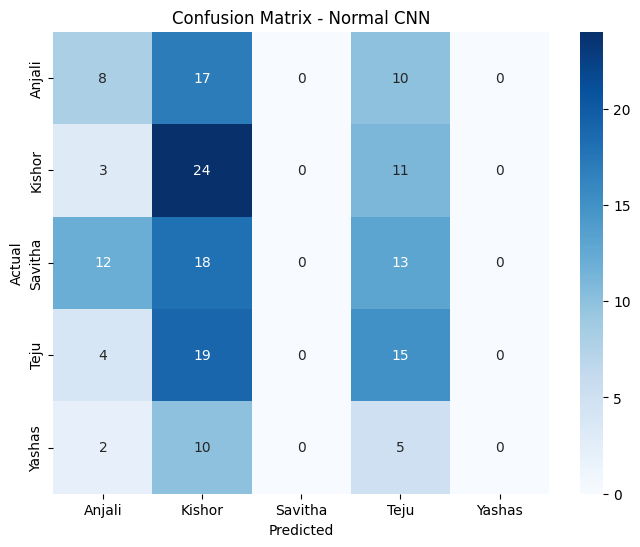

6/6 [==============================] - 9s 1s/step

Classification Report for VGG16:

              precision    recall  f1-score   support

      Anjali       0.06      0.06      0.06        35
      Kishor       0.32      0.32      0.32        38
     Savitha       0.17      0.16      0.16        43
        Teju       0.33      0.34      0.34        38
      Yashas       0.00      0.00      0.00        17

    accuracy                           0.20       171
   macro avg       0.17      0.18      0.17       171
weighted avg       0.20      0.20      0.20       171



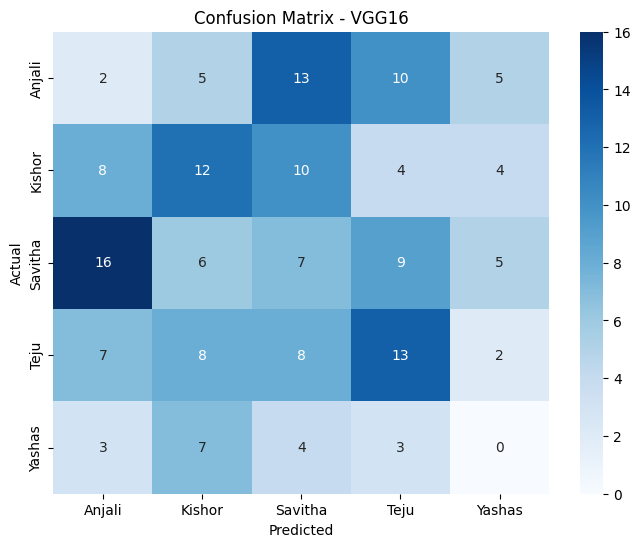

In [ ]:
def evaluate_model(model, generator, model_name):
    y_true = generator.classes
    y_pred = np.argmax(model.predict(generator), axis=1)
    
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred, target_names=generator.class_indices.keys()))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=generator.class_indices.keys(), yticklabels=generator.class_indices.keys())
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

evaluate_model(normal_model, val_generator, "Normal CNN")
evaluate_model(vgg_model, val_generator, "VGG16")

1/1 [==============================] - 0s 256ms/step


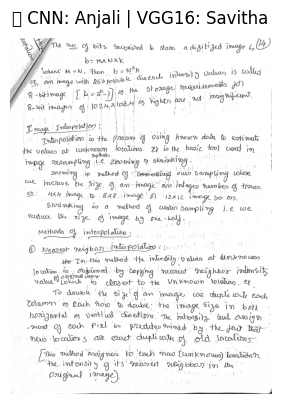

✅ CNN Predicted Writer: Anjali
✅ VGG16 Predicted Writer: Savitha


('Anjali', 'Savitha')

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_handwriting(img_path, cnn_model_path, vgg_model_path, class_indices):
   
   
    cnn_model = tf.keras.models.load_model(cnn_model_path)
    vgg_model = tf.keras.models.load_model(vgg_model_path)

    
    img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    
    cnn_prediction = cnn_model.predict(img_array)
    vgg_prediction = vgg_model.predict(img_array)

    
    cnn_predicted_class = np.argmax(cnn_prediction)
    vgg_predicted_class = np.argmax(vgg_prediction)

    
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse dictionary
    cnn_writer = class_labels[cnn_predicted_class]
    vgg_writer = class_labels[vgg_predicted_class]

    # Display the image
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title(f"📌 CNN: {cnn_writer} | VGG16: {vgg_writer}")
    plt.show()

    print(f" CNN Predicted Writer: {cnn_writer}")
    print(f" VGG16 Predicted Writer: {vgg_writer}")

    return cnn_writer, vgg_writer


image_path = r'C:\Users\vivek\OneDrive\Desktop\Capstone 2\Dataset\Train\Savitha\Module 1 DIP_page-0015.jpg'
cnn_model_path = "optimized_cnn_handwriting_model.h5"  # CNN model file
vgg_model_path = "vgg16_handwriting_model1.h5"    # VGG16 model file

predict_handwriting(image_path, cnn_model_path, vgg_model_path, train_generator.class_indices)
